## Análisis de rendimiento de agentes

### Introducción

Este apartado se enfoca en presentar métodos para evaluar el rendimiento de los agentes y así detectar posibles áreas de mejora en la ejecución de una venta. El análisis se realiza a partir de los reportes diarios de Interacción generados por Mitrol, considerando al menos los últimos cinco días. Esto permite contar con suficientes datos para garantizar que las observaciones reflejan de manera representativa el desempeño de cada agente o grupo de agentes.

Las variables importantes a tener en cuenta de cada llamada realizada por un agente son:
- **Tipificación:** categorización manual de la interacción de esa llamada
- **TalkingTime:** tiempo de duración de la llamada (en segundos)
- **Sentido:** llamada manual o proveniente del discador

DISCLAIMER: Al interpretar los resultados de este análisis es necesario tener en cuenta que las tipificaciones son cargadas manualmente por los agentes. Esto puede implicar ciertos márgenes de error, ya sea porque el agente es nuevo, porque no recibió instrucciones claras sobre cómo tipificar correctamente o simplemente por descuidos en el registro. Por lo tanto, corresponde al analista evaluar en qué medida estas posibles inconsistencias pueden afectar las conclusiones del estudio.

### Tipificaciones

Para ver la tabla completa de tipificaciones, hacé clic [aquí](Tabla_Tipificaciones.ipynb).


### ¿Cómo se mide la productividad?

Hay muchas formas de medir la productividad de un agente, pero su utilidad puede variar según la interpretación de quien evalúa. Hay que recordar que en una venta el estado emocional influye de manera decisiva, y lo que para un agente puede ser un factor clave, para otro puede resultar irrelevante.

Por ejemplo, medir la cantidad de llamadas realizadas en un día puede reflejar productividad en términos de volumen, pero no necesariamente en términos de calidad. En este caso, un agente que atiende menos llamadas pero logra más cierres podría estar mostrando un mejor desempeño.

Por ello, en este análisis el primer paso es identificar variables globales nos permitan tener una base justa y comparable, más allá de las diferencias individuales de cada agente. Esto debemos calcular a partir de las variables disponibles del reporte

### Grupos de agentes

In [1]:
ap_connection = ['MZA 94', 'MZA 95', 'MZA 96', 'MZA 97', 'MZA 98']
byl = ['MZA 307', 'MZA 308', 'MZA 309', 'MZA 310', 'MZA 99', 'MZA 100', 'MZA 301', 'MZA 302', 'MZA 303', 'MZA 304', 'MZA 305']
capa = ['MZA 72', 'MZA 73', 'MZA 74', 'MZA 75', 'MZA 76', 'MZA 77', 'MZA 78', 'MZA 79', 'MZA 80', 'MZA 81', 'MZA 82', 'MZA 83']
diana = ['MZA Sup2', 'MZA 46', 'MZA 47', 'MZA 48', 'MZA 49', 'MZA 50', 'MZA 51', 'MZA Sup5', 'MZA 52', 'MZA 53', 'MZA 54', 'MZA 55', 'MZA 56', 'MZA 57', 'MZA 58', 'MZA 59', 'MZA 60', 'MZA 61', 'MZA 62', 'MZA 63', 'MZA 64', 'MZA 65', 'MZA 66', 'MZA 67', 'MZA 68', 'MZA 69', 'MZA 70', 'MZA 71', 'MZA 84', 'MZA 85', 'MZA 86', 'MZA 87', 'MZA 88', 'MZA 89', 'MZA 90', 'MZA 91', 'MZA 92', 'MZA 93']
josefina_marcos = ['MZA 31', 'MZA 32', 'MZA 33', 'MZA 34', 'MZA 35', 'MZA 36', 'MZA 37', 'MZA 38', 'MZA 39', 'MZA 40', 'MZA 41', 'MZA 42', 'MZA 43', 'MZA 44', 'MZA 45']
melanie_naty = ['MZA 1', 'MZA 2', 'MZA 3', 'MZA 4', 'MZA 5', 'MZA 6', 'MZA 7', 'MZA 8', 'MZA 9', 'MZA 10', 'MZA 12', 'MZA 13', 'MZA 14', 'MZA 15']
yasmin_marina = ['MZA 16', 'MZA 18', 'MZA 19', 'MZA 20', 'MZA 21', 'MZA 22', 'MZA 23', 'MZA 24', 'MZA 25', 'MZA 26', 'MZA 27', 'MZA 28', 'MZA 29', 'MZA 30']
romi = ['MZA 306', 'MZA 311', 'MZA 312', 'MZA Sup3', 'MZA Sup4']

grupos_dict = {
    'ap_connection': ap_connection,
    'byl': byl,
    'capa': capa,
    'diana': diana,
    'josefina_marcos': josefina_marcos,
    'melanie_naty': melanie_naty,
    'yasmin_marina': yasmin_marina,
    'romi': romi
}

def asignar_grupo(nombre):
    for grupo, lista in grupos_dict.items():
        if nombre in lista:
            return grupo
    return 'sin grupo'  

In [ ]:
import pandas as pd 

data_raw_path = "../data/raw/"
dfs = []

reportes = ['1909.csv', '2309.csv', '2409.csv', '2509.csv', '2609.csv']

def asignar_turno(fecha):
    hora = fecha.time() 
    if pd.to_datetime('09:50:00').time() <= hora <= pd.to_datetime('15:30:00').time():
        return 'TM'
    elif pd.to_datetime('15:30:00').time() < hora <= pd.to_datetime('21:10:00').time():
        return 'TT'
    else:
        return 'fuera de turno'

for reporte in reportes:

    df = pd.read_csv(data_raw_path + reporte, sep=';', encoding='utf-8', dtype=str)

    
    df = df[["Inicio", "Nombre Agente", "Tipificación", "Causa Terminación", "TalkingTime", "Sentido", "Origen Corte"]]
    df = df[(df['Tipificación']!='No Disp.') | (df['Causa Terminación']=='Se contacta con el operador')]
    df['TalkingTime'] = pd.to_numeric(df['TalkingTime'], errors='coerce').astype('Int64')

    df['Inicio'] = pd.to_datetime(df['Inicio'], dayfirst=True)
    df['Turno'] = df['Inicio'].apply(asignar_turno)
    df = df.dropna(subset=['Nombre Agente'])
    df = df.dropna(subset=['TalkingTime'])
    df['grupo'] = df['Nombre Agente'].apply(asignar_grupo)

    dfs.append(df)

df_total = pd.concat(dfs, ignore_index=True)
df_total.head(3)


,Inicio,Nombre Agente,Tipificación,Causa Terminación,TalkingTime,Sentido,Origen Corte,Turno,grupo
0,2025-09-19 10:01:59,MZA 305,Conforme con plan-prestador actual,Se contacta con el operador,41,Discador Predictivo,Agente,TM,byl
1,2025-09-19 10:04:39,MZA 54,Cae Muda o Cortada,Se contacta con el operador,2,Discador Predictivo,Cliente,TM,diana
2,2025-09-19 10:06:27,MZA 53,Se corta durante la conversacion,Se contacta con el operador,11,Discador Predictivo,Cliente,TM,diana


In [3]:
df_total.to_csv("../data/process/llamadas_procesadas.csv", sep=';', encoding='utf-8',index=False)

## Distribución de tiempos de duración de cada tipificación

In [183]:
import matplotlib.pyplot as plt
import numpy as np

# FILTROS
df = df_total.copy()
grupos_filtrados = ["yasmin_marina", "melanie_naty","josefina_marcos"]
tipificacion_filtrada = "Cae Muda o Cortada"
size_bin = 1
quitar_x_porciento_extremo_sup = 0.02
turno_filtrado = "TT"


df_filtrado = df[(df["grupo"].isin(grupos_filtrados)) & (df["Tipificación"] == tipificacion_filtrada) & (df["Turno"] == turno_filtrado)]

if quitar_x_porciento_extremo_sup > 0:
    limite_sup = df_filtrado["TalkingTime"].quantile(1 - quitar_x_porciento_extremo_sup)
    df_filtrado = df_filtrado[df_filtrado["TalkingTime"] <= limite_sup]

bins = np.arange(0, df_filtrado["TalkingTime"].max() + size_bin, size_bin)

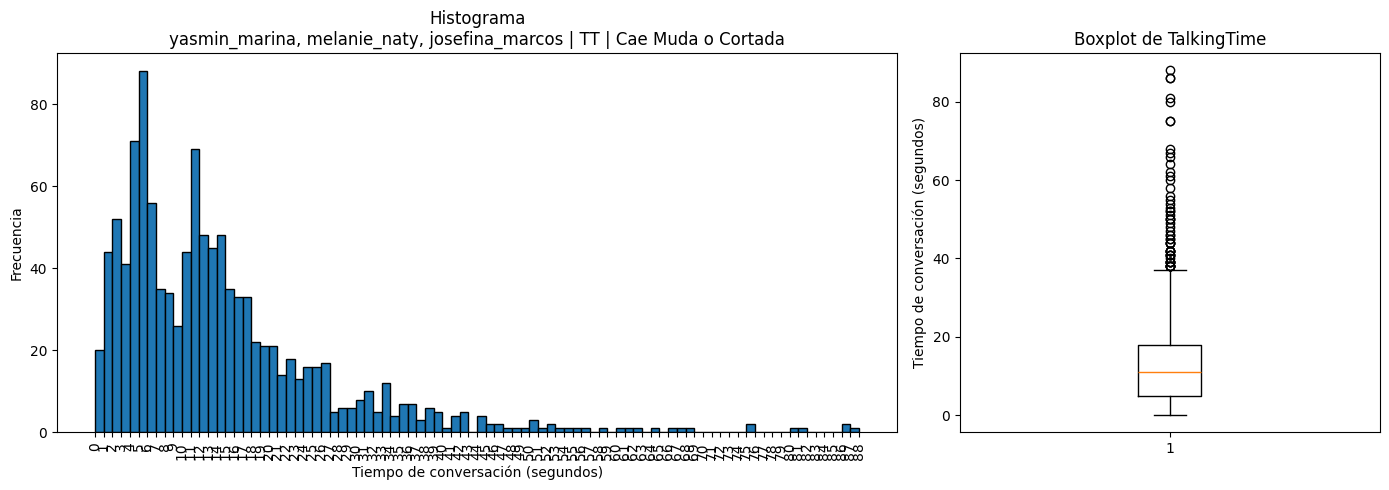

In [184]:
fig, axes = plt.subplots(ncols=2, figsize=(14,5), gridspec_kw={'width_ratios':[2, 1]})

# Histograma a la izquierda
axes[0].hist(df_filtrado["TalkingTime"], bins=bins, edgecolor="black")
axes[0].set_title(f"Histograma\n{', '.join(grupos_filtrados)} | {turno_filtrado} | {tipificacion_filtrada}")
axes[0].set_xlabel("Tiempo de conversación (segundos)")
axes[0].set_ylabel("Frecuencia")
axes[0].set_xticks(bins)
axes[0].set_xticklabels(bins, rotation=90)

# Boxplot vertical a la derecha
axes[1].boxplot(df_filtrado["TalkingTime"], vert=True)
axes[1].set_title("Boxplot de TalkingTime")
axes[1].set_ylabel("Tiempo de conversación (segundos)")

plt.tight_layout()
plt.show()

## Distribución de frecuencias de tipificación